Anotaciones para el powerpoint.
sobre que hablan los datos. 1 minuto sobre el proceso seguido para la limpieza de datos. fechas que contienen los datos. hablar sobre las anomalias encontradas en los datos.
explicar el cambio en las fechas para extraer el mes( feature engineering). hablar sobre las graficas (2 o 3 que se relacionen con algun interes): responder una pregunta interesante con un par de graficas relacionadas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv('BikeSales.csv')

# Revisar las primeras filas
display(df.head())

# Revisar información general del DataFrame
print(df.info())

# Resumen estadístico de las columnas numéricas
print(df.describe())

df.isna().sum()

df.dropna()

print(df.columns)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

Die Spalte date wird als datetime gespeichert.

In [2]:
df['Date'] = pd.to_datetime(df['Date']) 
df['Year_Month'] = df['Date'].dt.to_period('M')
 

In [3]:
df.duplicated().sum()

np.int64(1000)

In [4]:
df.shape

(113036, 19)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(112036, 19)

Age_Group
Adults (35-64)          42367181
Seniors (64+)             307070
Young Adults (25-34)    30467032
Youth (<25)             11685489
Name: Revenue, dtype: int64


<Axes: title={'center': 'Einnahme nach Altersgruppen'}, xlabel='Age_Group'>

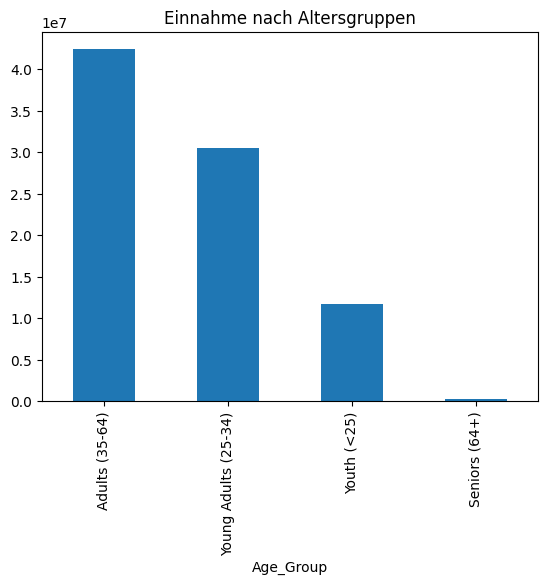

In [7]:

ventas_por_grupo_edad = df.groupby('Age_Group')['Revenue'].sum()

print(ventas_por_grupo_edad)
ventas_por_grupo_edad.sort_values(ascending=False,inplace=True)

ventas_por_grupo_edad.plot(kind='bar', title='Einnahme nach Altersgruppen')


Customer_Gender
F    41694689
M    43132083
Name: Revenue, dtype: int64


<Axes: title={'center': 'Einnahmen nach Geschlecht'}, ylabel='Revenue'>

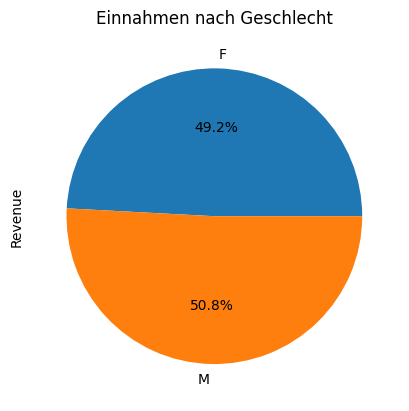

In [8]:
ventas_por_genero = df.groupby('Customer_Gender')['Revenue'].sum()
print(ventas_por_genero)

# Visualización
ventas_por_genero.plot(kind='pie', autopct='%1.1f%%', title='Einnahmen nach Geschlecht')


Product_Category
Accessories    15022766
Bikes          61434484
Clothing        8369522
Name: Revenue, dtype: int64


<Axes: title={'center': 'Gesamteinnahmen nach Productkategorie'}, xlabel='Product_Category'>

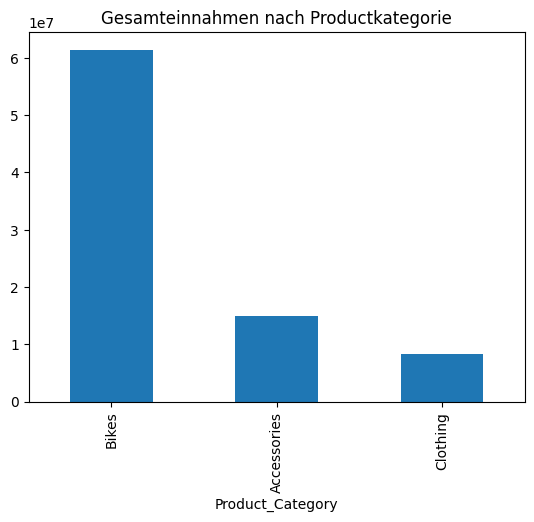

In [9]:
ventas_por_categoria = df.groupby('Product_Category')['Revenue'].sum()
print(ventas_por_categoria)
ventas_por_categoria.sort_values(ascending=False, inplace=True)
# Visualización
ventas_por_categoria.plot(kind='bar', title='Gesamteinnahmen nach Productkategorie')


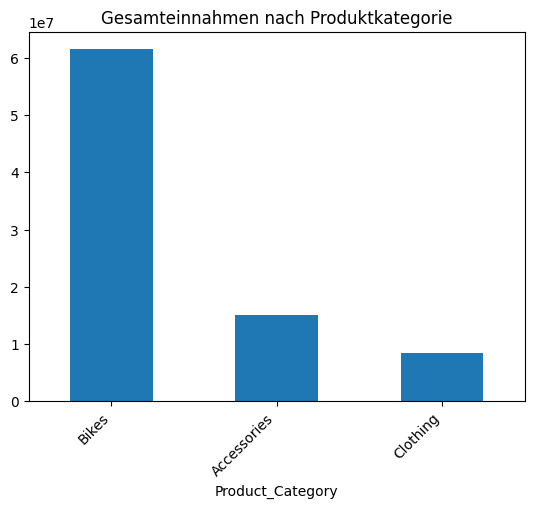

In [10]:
# Erstelle das Balkendiagramm
ventas_por_categoria.plot(kind='bar', title='Gesamteinnahmen nach Produktkategorie')
 
# Drehung der x-Achsen-Beschriftungen um 45°
plt.xticks(rotation=45, ha='right')
 
# Zeige den Plot an
plt.show()

Product
Mountain-500 Black, 52     19287
Mountain-500 Silver, 48    25794
Road-650 Red, 52           34669
Touring-3000 Blue, 50      45694
Mountain-500 Silver, 44    49638
Mountain-500 Silver, 52    51106
Mountain-500 Black, 42     55387
Touring-3000 Yellow, 62    56634
Touring-3000 Blue, 54      62968
Racing Socks, L            66589
Name: Revenue, dtype: int64


<Axes: title={'center': 'Top 10 verkaufte Produkte'}, xlabel='Product'>

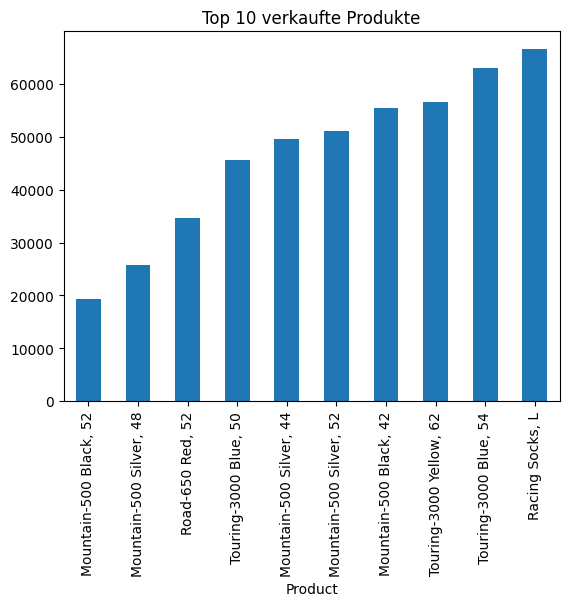

In [11]:
productos_mas_vendidos = df.groupby('Product')['Revenue'].sum().sort_values(ascending=True).head(10)
print(productos_mas_vendidos)

# Visualización
productos_mas_vendidos.plot(kind='bar', title='Top 10 verkaufte Produkte')


<Axes: title={'center': 'Top 10 verkaufte Produkte'}, ylabel='Product'>

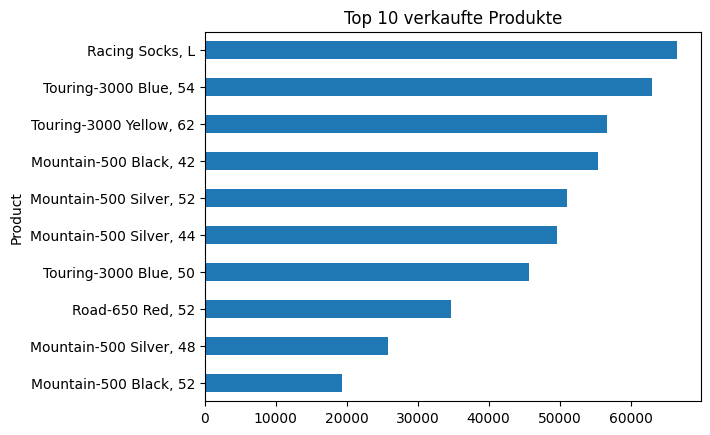

In [12]:
productos_mas_vendidos.plot(kind='barh', title='Top 10 verkaufte Produkte')

Product
Mountain-200 Black, 38     1302237
Road-150 Red, 62           1237388
Mountain-200 Silver, 42    1226878
Sport-100 Helmet, Red      1191175
Mountain-200 Silver, 38    1155311
Sport-100 Helmet, Black    1140795
Mountain-200 Black, 46     1075401
Sport-100 Helmet, Blue     1047701
Road-150 Red, 52           1044569
Mountain-200 Black, 42     1032061
Name: Profit, dtype: int64


<Axes: title={'center': 'Top 10 rentabelste Produkte'}, ylabel='Product'>

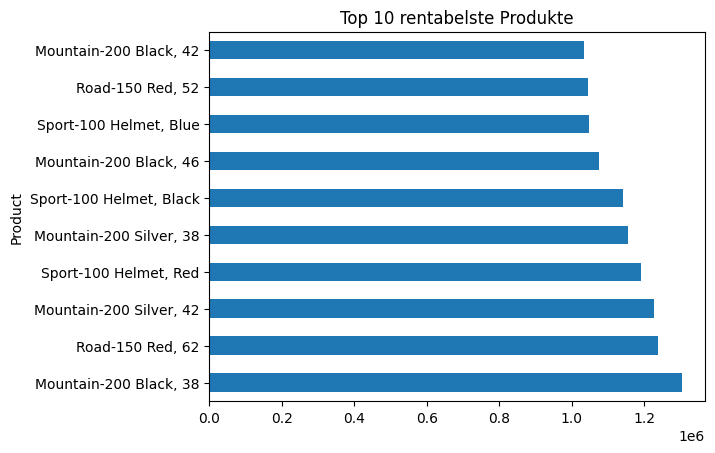

In [13]:
rentabilidad_por_producto = df.groupby('Product')['Profit'].sum().sort_values(ascending=False)
print(rentabilidad_por_producto.head(10))

# Visualización
rentabilidad_por_producto.head(10).plot(kind='barh', title='Top 10 rentabelste Produkte')


Product_Category
Accessories    56.492086
Bikes          32.592335
Clothing       31.496657
Name: Profit_Margin, dtype: float64


<Axes: title={'center': 'Profitmarge nach Produktkategorie'}, xlabel='Product_Category'>

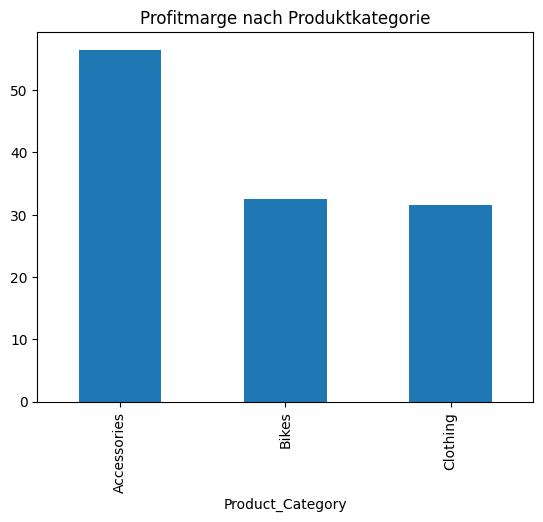

In [14]:
df['Profit_Margin'] = df['Profit'] / df['Revenue'] * 100
margen_beneficio_categoria = df.groupby('Product_Category')['Profit_Margin'].mean()
print(margen_beneficio_categoria)

# Visualización
margen_beneficio_categoria.plot(kind='bar', title='Profitmarge nach Produktkategorie')


Year
2011     8951966
2012     9133795
2013    15117327
2014    14040192
2015    19945703
2016    17637789
Name: Revenue, dtype: int64


<Axes: title={'center': 'Jährliche Einnahmen'}, xlabel='Year'>

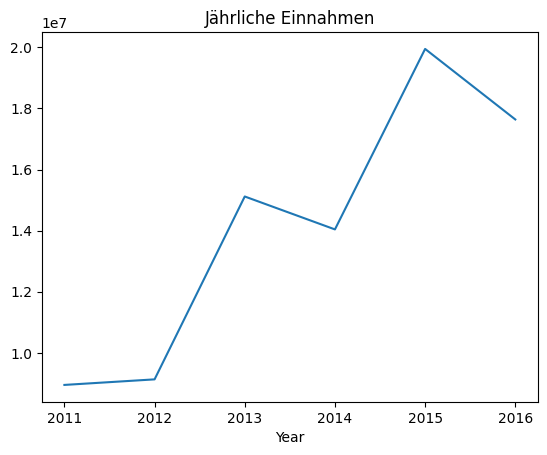

In [15]:
ventas_por_ano = df.groupby('Year')['Revenue'].sum()
print(ventas_por_ano)

# Visualización
ventas_por_ano.plot(kind='line', title='Jährliche Einnahmen')


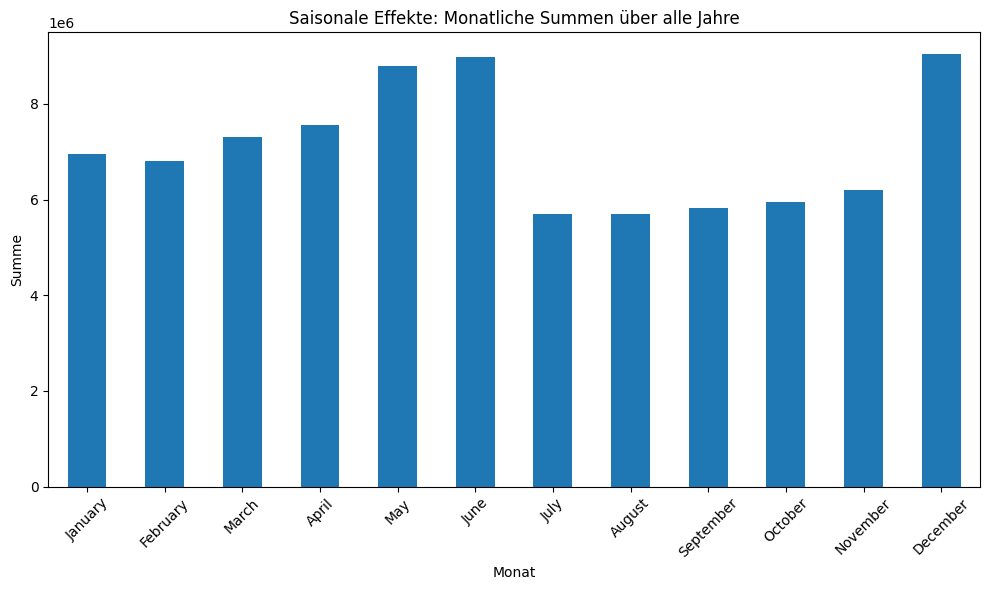

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Beispiel DataFrame
# df enthält die Spalten 'Date' und 'Value', wobei 'Value' die Werte sind, die du summieren möchtest
# df['Date'] ist bereits im datetime-Format

# Schritt 1: Monatsnamen extrahieren
df['Month_Name'] = df['Date'].dt.strftime('%B')

# Schritt 2: Eine feste Reihenfolge der Monate festlegen, um chronologisch zu sortieren
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

# Wandel die 'Month_Name'-Spalte in eine kategorische Spalte mit der definierten Reihenfolge um
df['Month_Name'] = pd.Categorical(df['Month_Name'], categories=month_order, ordered=True)

# Schritt 3: Nach Month_Name gruppieren und summieren, um die saisonalen Effekte zu analysieren
seasonal_sums = df.groupby('Month_Name',observed=False)['Revenue'].sum()

# Schritt 4: Plot erstellen
plt.figure(figsize=(10,6))
seasonal_sums.plot(kind='bar')
plt.title('Saisonale Effekte: Monatliche Summen über alle Jahre')
plt.xlabel('Monat')
plt.ylabel('Summe')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Country
United States     27777098
Australia         21196395
United Kingdom    10575628
Germany            8956724
France             8414745
Canada             7906182
Name: Revenue, dtype: int64


<Axes: title={'center': 'Verkäufe nach Land'}, xlabel='Country'>

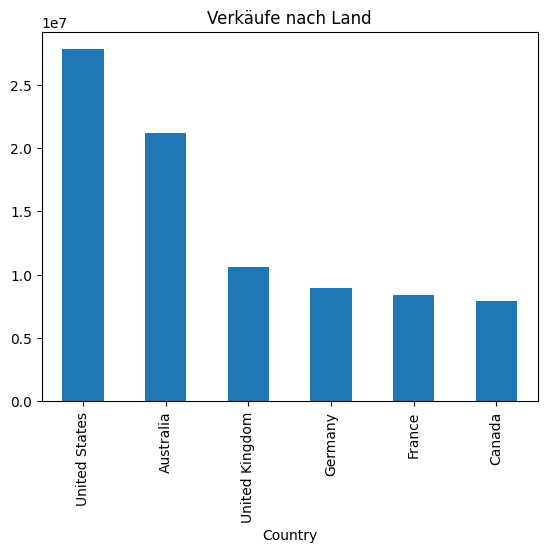

In [17]:
ventas_por_pais = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
print(ventas_por_pais)

# Visualización
ventas_por_pais.plot(kind='bar', title='Verkäufe nach Land')


State
California             17529787
England                10575628
New South Wales         9125980
British Columbia        7848334
Washington              6701258
Queensland              5055843
Victoria                5038294
Oregon                  3435046
Hessen                  2067980
Saarland                2026497
Nordrhein-Westfalen     1803855
Seine (Paris)           1642370
Hamburg                 1550469
South Australia         1396139
Bayern                  1338181
Nord                    1319127
Seine Saint Denis       1126738
Essonne                  972701
Hauts de Seine           935836
Yveline                  688924
Tasmania                 580139
Seine et Marne           372243
Loiret                   325081
Moselle                  266124
Garonne (Haute)          183412
Brandenburg              169742
Val d'Oise               148295
Charente-Maritime        106000
Somme                    101846
Val de Marne              93102
Loir et Cher              82533
Al

<Axes: title={'center': 'Verkäufe nach Staat (Top 10)'}, xlabel='State'>

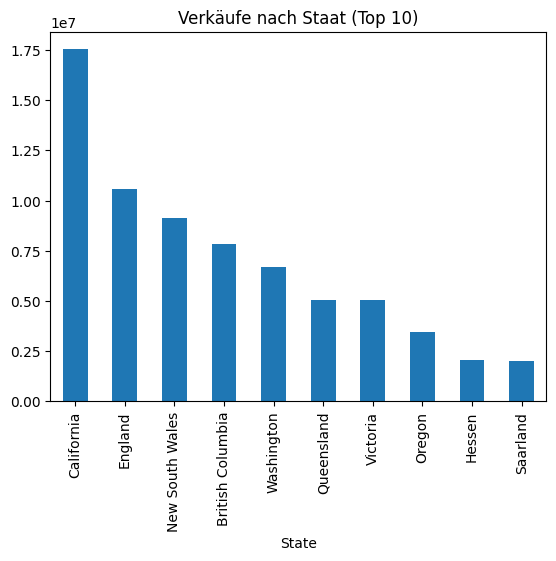

In [18]:
ventas_por_estado = df.groupby('State')['Revenue'].sum().sort_values(ascending=False)
print(ventas_por_estado)

# Visualización
ventas_por_estado.head(10).plot(kind='bar', title='Verkäufe nach Staat (Top 10)')


Product_Category
Accessories    1042791
Bikes            36201
Clothing        254713
Name: Order_Quantity, dtype: int64


<Axes: title={'center': 'Bestellmenge nach Kategorie'}, xlabel='Product_Category'>

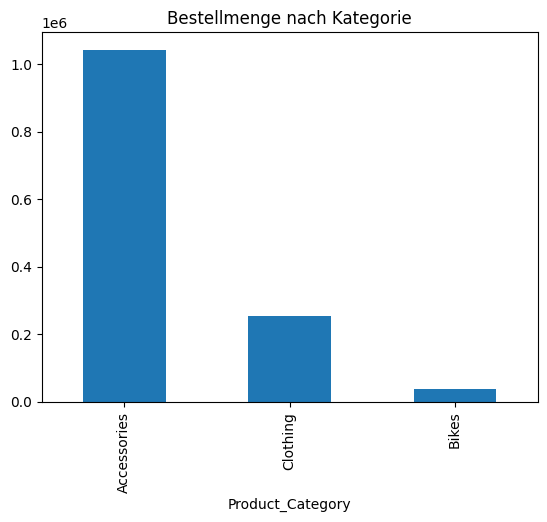

In [19]:
cantidad_por_categoria = df.groupby('Product_Category')['Order_Quantity'].sum()
print(cantidad_por_categoria)
cantidad_por_categoria.sort_values(inplace=True,ascending=False)
# Visualización
cantidad_por_categoria.plot(kind='bar', title='Bestellmenge nach Kategorie')

